Made by Ali Al Aoraebi
Student Number 101386021

Digital Divide in Canada 

The project will aim to answer the question "How does the digital divide affect educational outcomes in different communities in Canada?". As we all know, the digital divide is very prominent around the world. In regards to Canada, the divide is caused due to differences in urban and rural areas, and socio-economic issues. The lack of access to technology limits the ability of students in such areas to engage in the benefits of education through technology! 

Data sets:
- Internet access and use
- Socio-economic indicators
- Geographical data
- Education outcomes and spending

Source: https://www.statcan.gc.ca/en/start

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Internet Availability Analysis

The provided code block reads a dataset containing information about the availability of 25 Mbps internet in various regions of Canada, handling potential encoding issues by trying different character encodings. The data is filtered to compare the availability of 25 Mbps internet across 'Rural areas', 'Small population centres', and 'Large population centres'.

### Data Cleaning and Preparation
- The '%' sign is removed from the percentage values, and the data is converted to a numeric type for accurate comparisons.

### Visualization
- A bar chart is generated to visually compare the internet availability across different population centres within each province or territory.
- Each province/territory is represented on the x-axis, while the y-axis indicates the percentage availability of 25 Mbps internet.
- Rural areas are marked in blue, small population centres in green, and large population centres in orange for clear distinction.
- The bars are slightly offset from each other to prevent overlapping and ensure each category is distinctly visible.

### Insights
- The bar chart shows that large population centres generally have better internet availability compared to rural areas and small population centres.
- Some provinces, such as Alberta and British Columbia, exhibit high internet availability across all three categories, whereas others, notably the Northern territories, show a significant digital divide, with rural areas having markedly lower internet availability.
- This visualization aids in understanding the disparities in internet access, which is a crucial factor in the digital divide, potentially impacting various aspects of life, including education, healthcare, and economic opportunities.


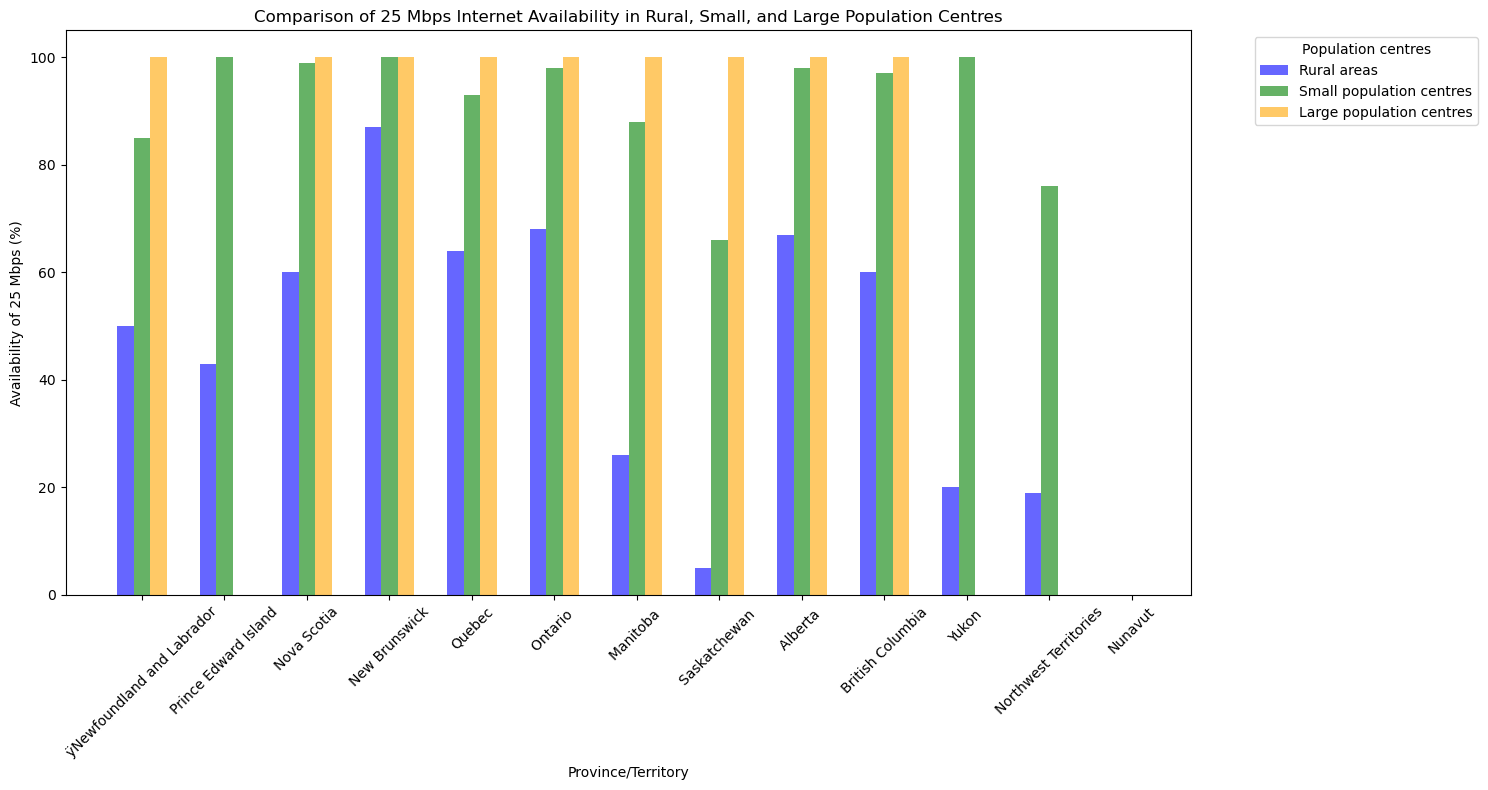

In [3]:
try:
    df = pd.read_csv('./data/25MbpsProvincialAvailability.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('./data/25MbpsProvincialAvailability.csv', encoding='cp1252')
    except UnicodeDecodeError:
        df = pd.read_csv('./data/25MbpsProvincialAvailability.csv', encoding='utf-16')
        
# Filtering out necessary columns for comparison
comparison_df = df[['Province/Territory', 'Rural areas', 'Small population centres', 'Large population centres']]
# Removing '%' sign and converting to numeric for comparison
comparison_df['Rural areas'] = comparison_df['Rural areas'].str.rstrip('%').astype('float')
comparison_df['Small population centres'] = comparison_df['Small population centres'].str.rstrip('%').astype('float')
comparison_df['Large population centres'] = comparison_df['Large population centres'].str.rstrip('%').astype('float')

# Plotting the data for visual comparison
plt.figure(figsize=(15, 8))
bar_width = 0.2
index = range(len(comparison_df['Province/Territory']))

plt.bar(index, comparison_df['Rural areas'], width=bar_width, color='blue', alpha=0.6, label='Rural areas')
plt.bar([i + bar_width for i in index], comparison_df['Small population centres'], width=bar_width, color='green', alpha=0.6, label='Small population centres')
plt.bar([i + bar_width*2 for i in index], comparison_df['Large population centres'], width=bar_width, color='orange', alpha=0.6, label='Large population centres')
plt.xlabel('Province/Territory')
plt.ylabel('Availability of 25 Mbps (%)')
plt.title('Comparison of 25 Mbps Internet Availability in Rural, Small, and Large Population Centres')
plt.xticks([i + bar_width for i in index], comparison_df['Province/Territory'], rotation=45)
plt.legend(title='Population centres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Trends in Internet Usage Across Canada by Region

The script loads a dataset on internet usage across various regions in Canada for the years 2018, 2020, and 2022. It then visualizes the trends in internet usage over these years.

### Visualization
- The plot consists of multiple line charts, each representing a region in Canada.
- Internet usage percentage is plotted on the y-axis, and the years are on the x-axis.
- The use of seaborn's `lineplot` with markers helps in tracking changes over the specified years.
- A grid is added for better readability, and the x-axis ticks are set to the specified years to avoid any confusion.

### Observations
- The line plots illustrate an overall increase in internet usage across most regions in Canada.
- Certain regions show a steady increase, while others have a more variable trend.
- The plot highlights the differences in internet usage growth rates between regions, which may indicate disparities in infrastructure development or changes in demographics and population behavior.

### Significance
- Understanding these trends is crucial for policymakers and businesses to identify areas that may require more attention or investment in digital infrastructure.
- It also provides insights into the potential for digital markets and services in different regions.


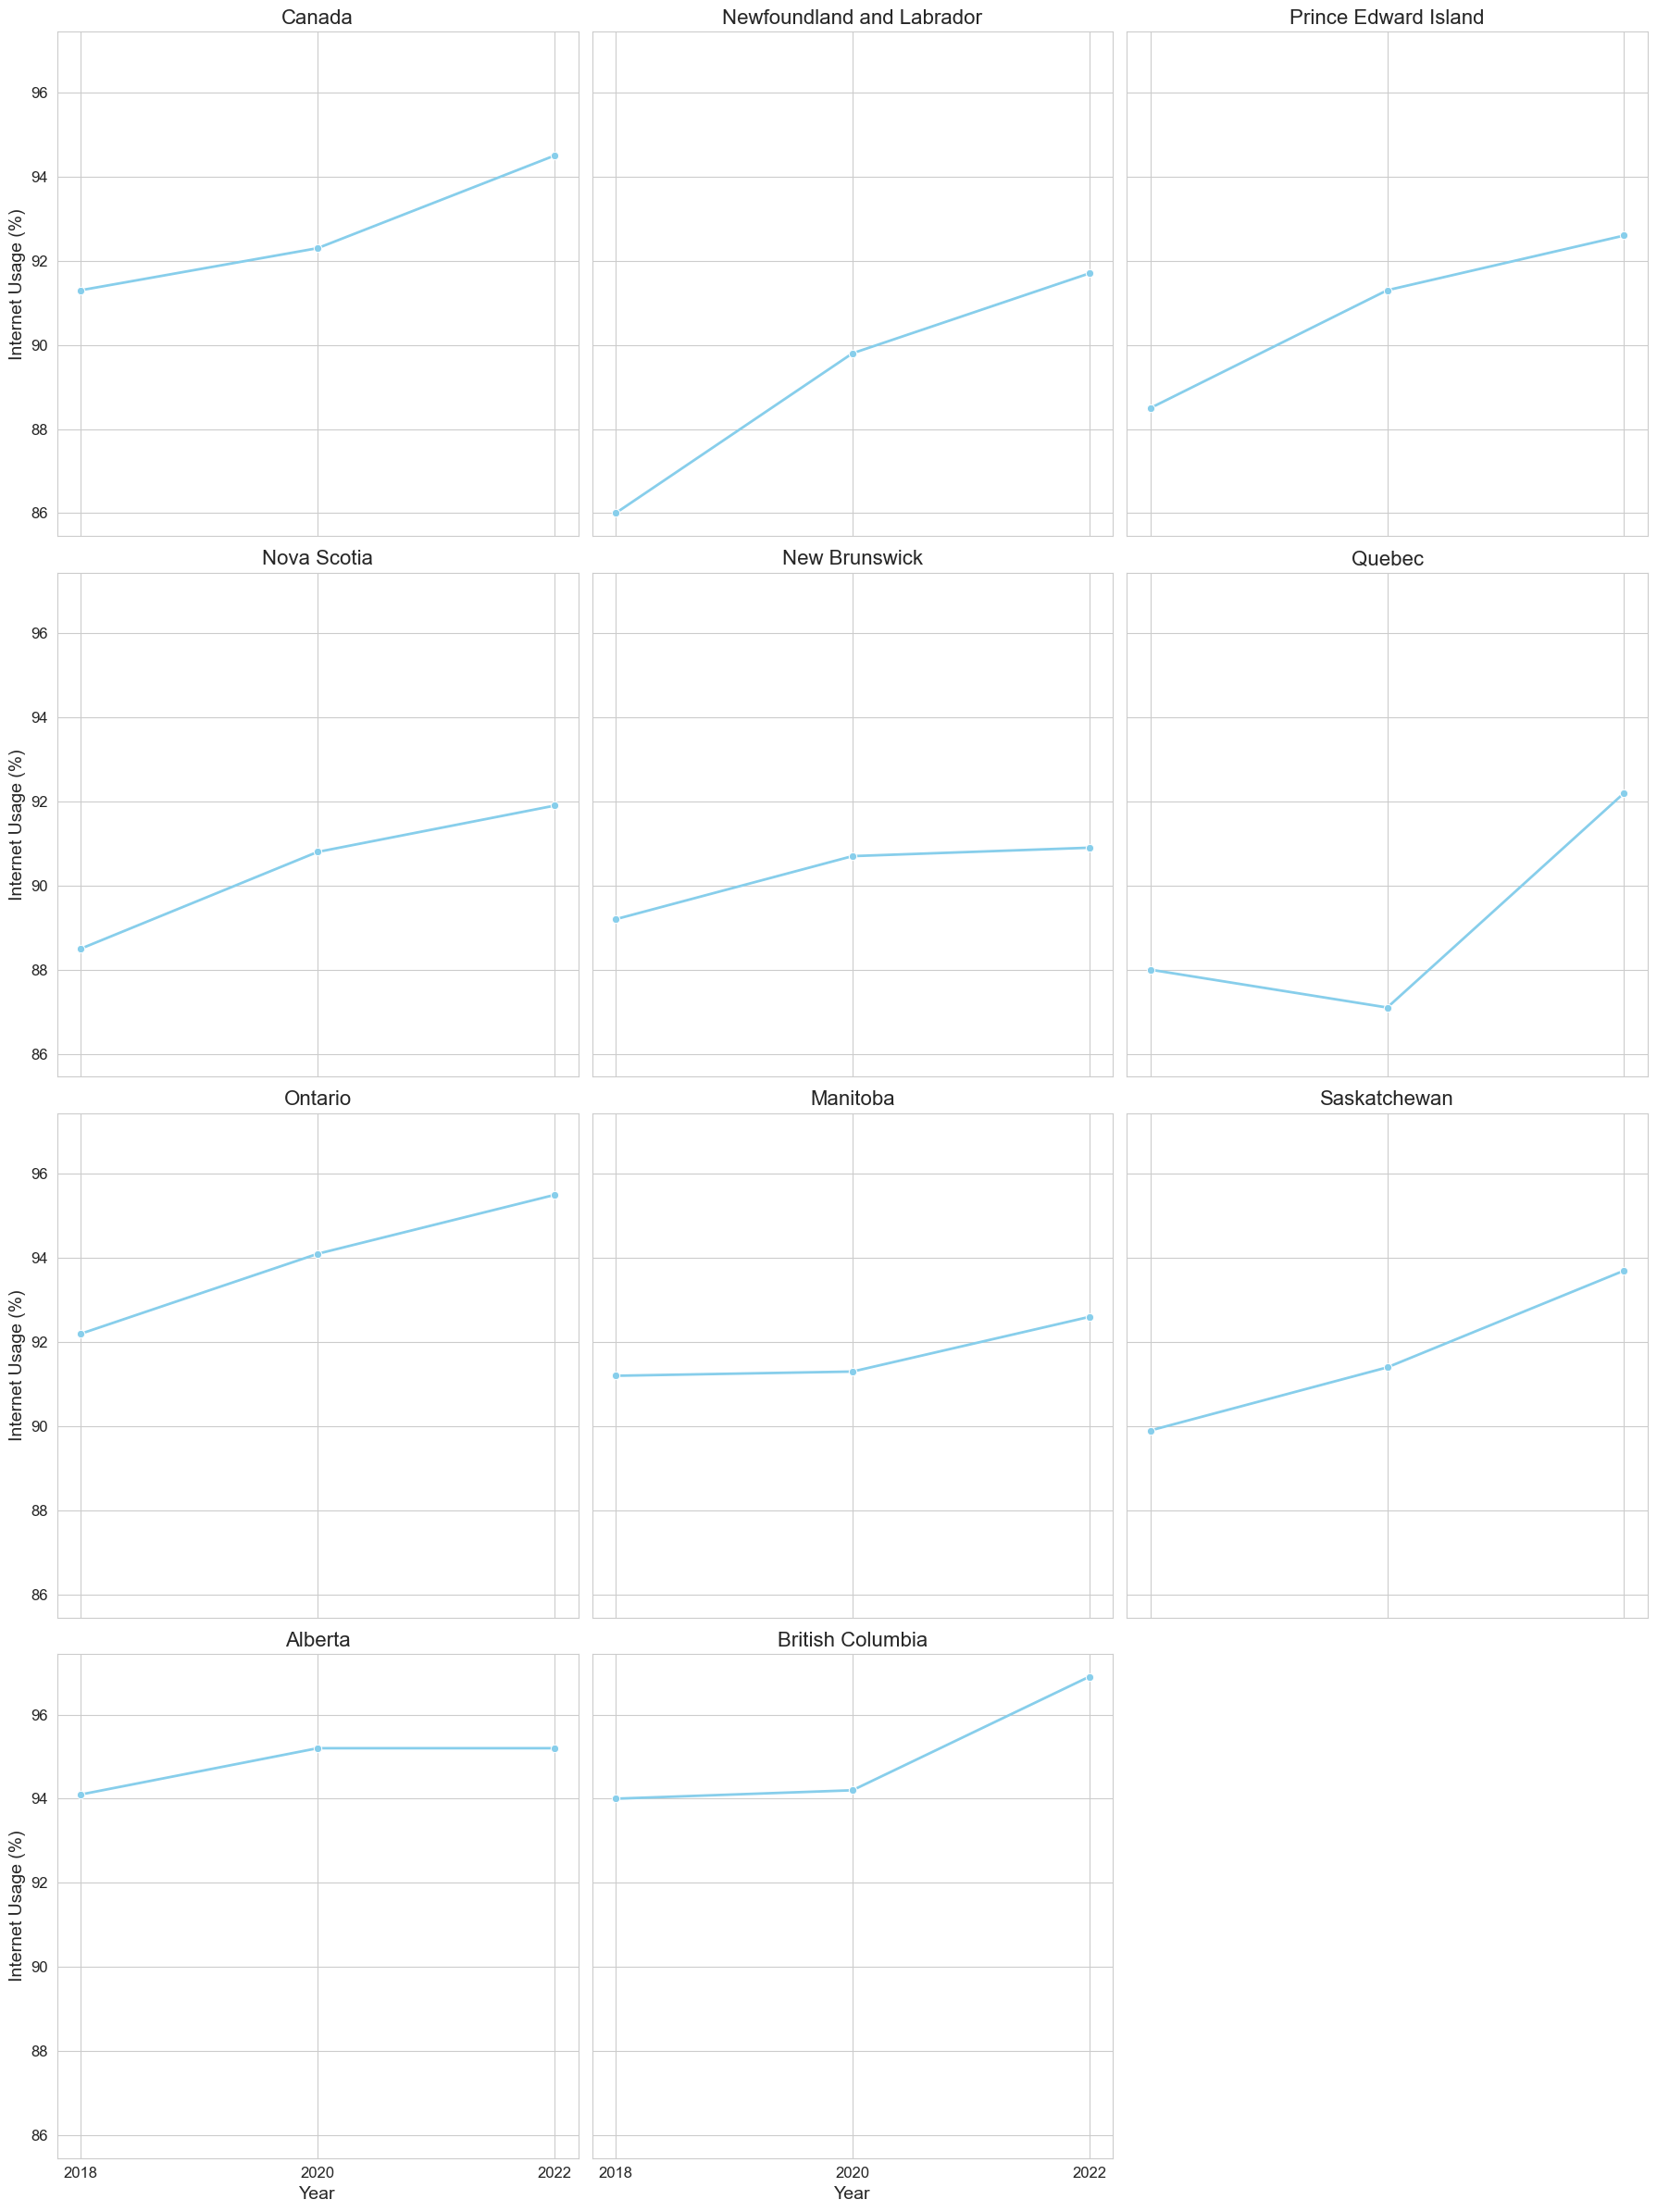

In [4]:
df = pd.read_csv('./data/internet-use.csv')

# Defining the regions based on the unique values in the 'GEO' column of your dataframe
regions = df['GEO'].unique()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining the number of rows/columns based on the number of regions
n_regions = len(regions)
n_cols = 3
n_rows = -(-n_regions // n_cols)  # Calculating the required number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6), sharex=True, sharey=True)
axes = axes.flatten()
years = [2018, 2020, 2022]

# Looping through each region and creating a line plot
for i, region in enumerate(regions):
    region_data = df[df['GEO'] == region]
    sns.lineplot(ax=axes[i], data=region_data, x='REF_DATE', y='VALUE', marker='o', linewidth=2, color='skyblue')
    axes[i].set_title(region, fontsize=16)
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].set_ylabel('Internet Usage (%)', fontsize=14)
    axes[i].grid(True)  # Adding grid
    axes[i].tick_params(labelsize=12)
    axes[i].set_xticks(years)

plt.tight_layout()

# Hiding any unused subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])
    
plt.show()


## Internet Access by Location and Family Income in 2022

The code snippet reads data from a CSV file that provides information on internet access across different family income quartiles and locations in 2022. It then generates a bar plot visualizing this data.

### Visualization
- The bar plot provides a clear visual comparison of internet access percentages across various locations such as home, work, school, and public places.
- The 'Family Income Quartile' serves as a hue to differentiate between the income groups in the dataset.
- Locations are listed on the y-axis and the percentage of internet access is on the x-axis.
- The plot is sizable enough for an audience to discern the differences among income quartiles regarding internet access at different locations.

### Observations
- The visualization highlights disparities in internet access based on income, with higher income quartiles generally having more access, especially at home.
- It also indicates that internet access at locations like work and school is less variable across income quartiles.

### Significance
- This graph provides valuable insights into the digital divide, illustrating how socioeconomic status may influence the accessibility and usage of the internet in various settings.
- Such insights can be instrumental for stakeholders in digital equity initiatives and policy development aimed at bridging the digital divide.


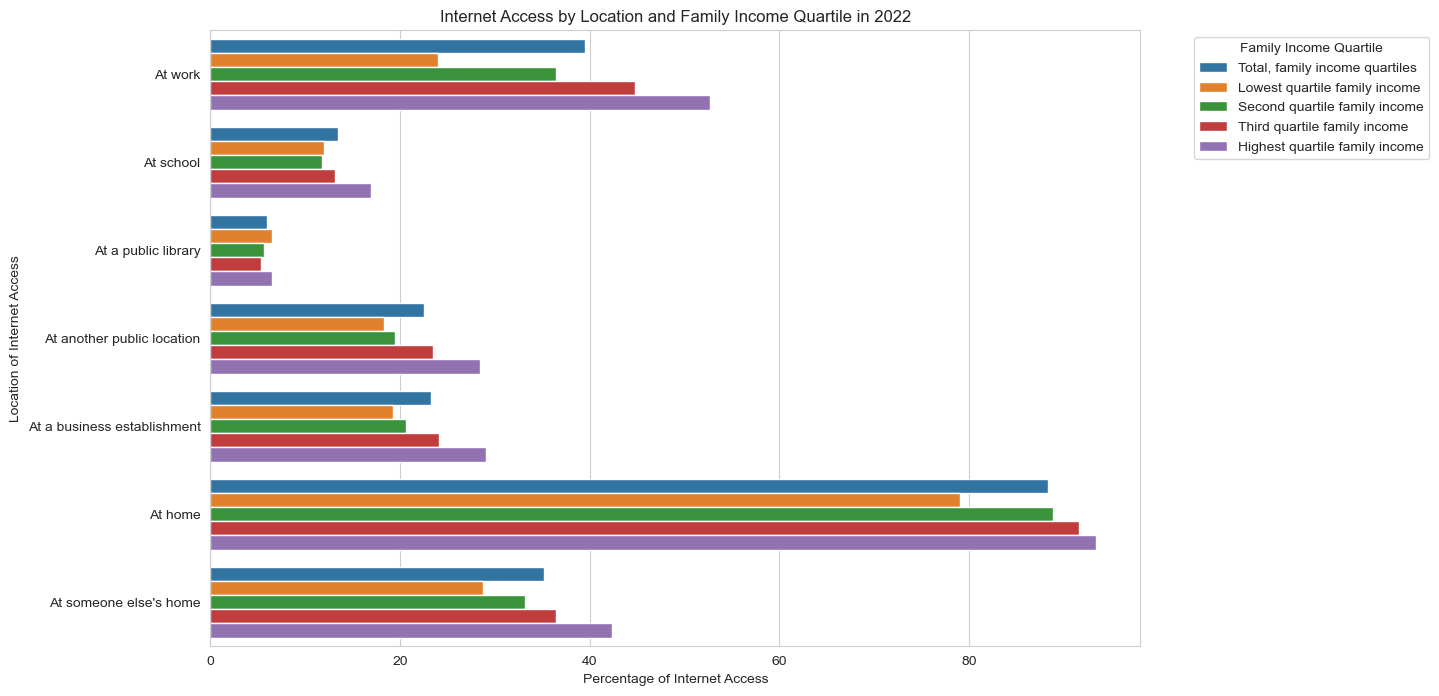

In [5]:
file_path_2022 = './data/InternetAccessByIncome2022.csv'
data_2022 = pd.read_csv(file_path_2022)

plt.figure(figsize=(12, 8))
sns.barplot(data=data_2022, y='Location of Internet access', x='VALUE', hue='Family income quartile')
plt.title('Internet Access by Location and Family Income Quartile in 2022')
plt.ylabel('Location of Internet Access')
plt.xlabel('Percentage of Internet Access')
plt.legend(title='Family Income Quartile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Evolution of Educational Attainment in Canada

The following Python code snippet imports necessary libraries and reads data from an educational outcome CSV file. It then processes the data to focus on specific levels of education and creates a heatmap to visualize the changes in educational attainment over different census years in Canada.

### Data Preparation and Visualization
- The dataset is filtered to include only specific educational levels, such as "No certificate, diploma or degree" and various levels of postsecondary achievements.
- A pivot table is created to restructure the data with educational levels as rows and census years as columns, facilitating a direct comparison across years.
- A heatmap is then generated to visually represent this data, with annotations showing the exact percentage values for easy reference.

### Observations from the Heatmap
- The heatmap indicates a trend of increasing attainment of higher education levels over time, with a noticeable decrease in the population with no certificates or degrees.
- The shift towards higher education can be seen as the percentages for "Postsecondary certificate, diploma or degree" and "Bachelor's degree or higher" categories grow with each subsequent census year.

### Significance
- This visualization underscores the progression of educational qualifications in Canada, which can have wide-reaching implications for the workforce, economy, and societal development.
- Such trends could be correlated with other socioeconomic factors, including income levels and employment rates, to gain comprehensive insights into the benefits of higher education.

Filtered Data: 
 Highest certificate, diploma or degree (15)
No certificate, diploma or degree               56
Postsecondary certificate, diploma or degree    56
Bachelor’s degree or higher                     56
Bachelor's degree                               56
Name: count, dtype: int64
Pivot Table: 
 Census year (4)                                    2006       2011       2016  \
Highest certificate, diploma or degree (15)                                     
Bachelor's degree                             10.300000  11.928571  13.742857   
Bachelor’s degree or higher                   15.514286  17.992857  20.214286   
No certificate, diploma or degree             28.721429  24.921429  22.114286   
Postsecondary certificate, diploma or degree  47.464286  50.642857  52.250000   

Census year (4)                                    2021  
Highest certificate, diploma or degree (15)              
Bachelor's degree                             15.171429  
Bachelor’s degree or higher      

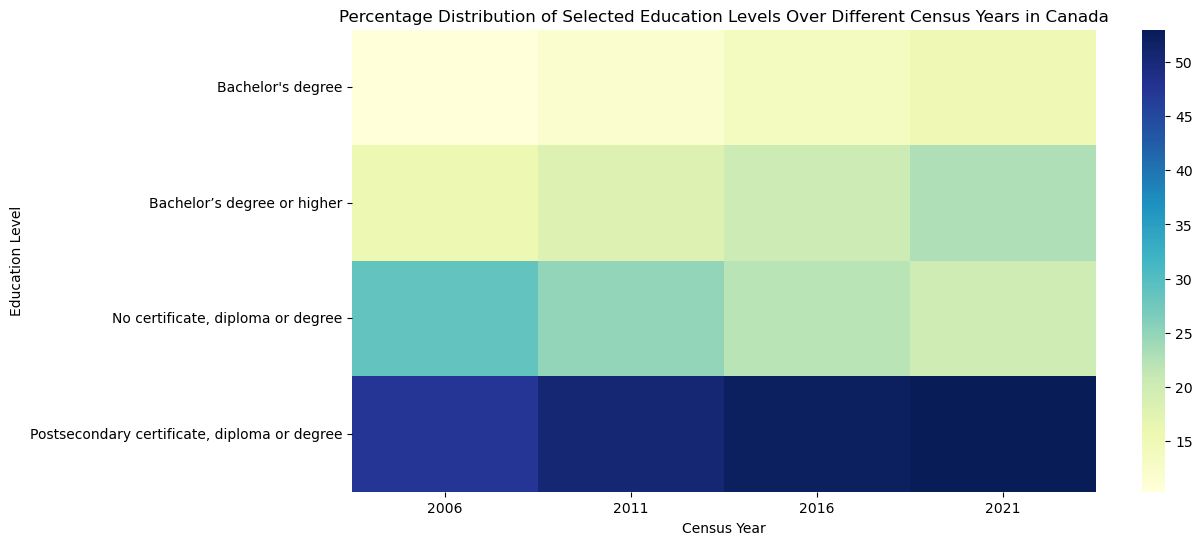

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eduDF = pd.read_csv('./data/edu-outcome.csv')

# Adjusted education levels
specific_levels_adjusted = [
    "No certificate, diploma or degree", 
    "Postsecondary certificate, diploma or degree",
    "Bachelor's degree",
    "Bachelor’s degree or higher"
]

# Filtering the dataset
filtered_for_adjusted_levels = eduDF[
    eduDF['Highest certificate, diploma or degree (15)'].isin(specific_levels_adjusted)
]

# Check if the filter is working correctly
print("Filtered Data: \n", filtered_for_adjusted_levels['Highest certificate, diploma or degree (15)'].value_counts())

# Creating the pivot table
pivot_for_adjusted_levels = filtered_for_adjusted_levels.pivot_table(
    index='Highest certificate, diploma or degree (15)', 
    columns='Census year (4)', 
    values='VALUE'
)

# Check if the pivot table looks correct
print("Pivot Table: \n", pivot_for_adjusted_levels)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_for_adjusted_levels, fmt=".1f", cmap="YlGnBu")
plt.title('Percentage Distribution of Selected Education Levels Over Different Census Years in Canada')
plt.xlabel('Census Year')
plt.ylabel('Education Level')
plt.show()


## School Board Expenditures in Canada: A Five-Year Overview

The following Python code snippet is designed to analyze the trend of school board expenditures in Canada over a five-year period, from 2016 to 2020. The code performs data manipulation to focus on total expenditures and creates a line plot to visualize this trend over time.

### Data Processing and Visualization
- The data is filtered to focus on 'Total expenditures' within the school board expenditure dataset.
- A line plot is then created, highlighting the trend of school board expenditures over the specified years.

### Observations from the Line Plot
- The plot provides a clear depiction of how school board expenditures have evolved over the five-year period.
- There appears to be a relatively stable trend with slight fluctuations, indicating consistent investment in education.

### Implications
- Understanding the trend in school board expenditures is crucial as it reflects the financial commitment towards education, potentially impacting the quality of education and resources available to students.
- Looking at the graudation rate, this data can be further analyzed in conjunction with student performance metrics and demographic shifts to evaluate the effectiveness of the expenditures. 


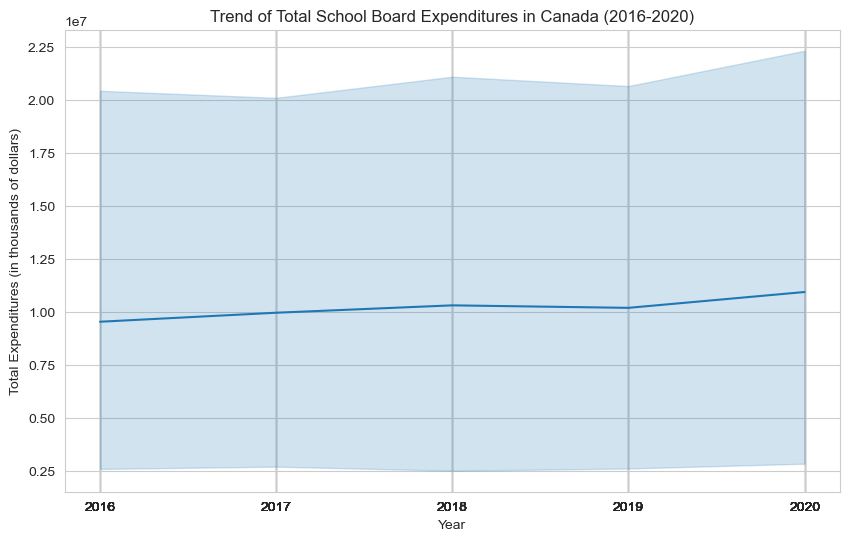

In [7]:
eduExpDF = pd.read_csv('./data/school-expenditures.csv')

# Filtering the dataset for total expenditures
total_expenditures_data = eduExpDF[eduExpDF['School board expenditures'] == 'Total expenditures']

# Plotting the time series of total school board expenditures
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_expenditures_data, x='REF_DATE', y='VALUE')
plt.title('Trend of Total School Board Expenditures in Canada (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Total Expenditures (in thousands of dollars)')
plt.xticks(total_expenditures_data['REF_DATE']) 
plt.show()

## Income Changes in Canada: A Five-Year Gap Analysis

This Python code snippet is tailored to analyze the change in the distribution of after-tax income groups in Canada over a period of five years. The code effectively manipulates a dataset to focus on the year-to-year difference in income distribution and visualizes it in a tabular format.

### Data Manipulation and Analysis
- A refined parsing function is utilized to interpret income values from string formats within the dataset.
- The data is filtered to focus on the two latest years available and the relevant income groups.
- A new 'Difference' column is calculated to show the change in income distribution between the two years.

### Insights from the Analysis
- The table provides a comprehensive view of the shifts in income distribution, indicating which income groups have seen increases or decreases.
- Notably, the 'Difference' column allows for quick identification of trends, such as which income groups have grown or shrunk.

### Implications for Policy and Economy
- Insights from this data can inform policymakers about the economic shifts among the population.
- Understanding these trends is crucial for designing targeted economic policies and assessing the impact of existing financial measures.

In [9]:
# Function to parse income values from strings
def parse_income_value_refined(income_string):
    """
    Parses numeric values from income group strings.
    Handles various formats and special cases in income strings.
    """
    if income_string.startswith("Under"):
        return 0
    elif "to" in income_string:
        return int(income_string.split(" ")[0].replace("$", "").replace(",", ""))
    elif income_string.startswith("Median"):
        digits = ''.join(filter(str.isdigit, income_string))
        return int(digits) if digits else float('inf')
    elif income_string.startswith("$"):
        return int(income_string.replace("$", "").replace(",", "").split(" ")[0])
    else:
        return float('inf')

incomeDF = pd.read_csv('./data/income-non-family.csv')

years_to_compare = incomeDF['Year (2)'].unique()[:2]

# Filtering the data for these two years and the required income groups
comparison_data = incomeDF[incomeDF['Year (2)'].isin(years_to_compare)]

# Calculating the increase between the two years
grouped_comparison_data = comparison_data.groupby(['After-tax income group (18)', 'Year (2)'])['VALUE'].sum().unstack()

# Applying the refined parsing function to the 'grouped_comparison_data' DataFrame
grouped_comparison_data['Income_Value'] = grouped_comparison_data.index.to_series().apply(parse_income_value_refined)

# Sorting the table based on the income value
grouped_comparison_data_sorted = grouped_comparison_data.sort_values(by='Income_Value')

# Dropping the temporary Income_Value column
grouped_comparison_data_sorted.drop('Income_Value', axis=1, inplace=True)

# Calculating the difference between the two years and create the "Difference" column
grouped_comparison_data_sorted['Difference'] = grouped_comparison_data_sorted[years_to_compare[0]] - grouped_comparison_data_sorted[years_to_compare[1]]

# Formatting numbers with commas
for year in years_to_compare:
    grouped_comparison_data_sorted[year] = grouped_comparison_data_sorted[year].apply(lambda x: "{:,}".format(x))
grouped_comparison_data_sorted['Difference'] = grouped_comparison_data_sorted['Difference'].apply(lambda x: "{:,}".format(x))

# Resetting the index and set the 'After-tax income group' as the new index
grouped_comparison_data_sorted.reset_index(inplace=True)
grouped_comparison_data_sorted_indexed = grouped_comparison_data_sorted.set_index('After-tax income group (18)')

# Adjusting the DataFrame to remove "Year (2)" from the column names and fixing the alignment of the index name
grouped_comparison_data_sorted_indexed.columns = [str(col) for col in grouped_comparison_data_sorted_indexed.columns]
grouped_comparison_data_sorted_indexed.index.name = 'After-tax income group'

grouped_comparison_data_sorted_indexed



,2015,2020,Difference
After-tax income group,,,
"Under $5,000","609,265","512,945","-96,320"
"$5,000 to $9,999","431,885","251,735","-180,150"
"$10,000 to $14,999","823,085","471,115","-351,970"
"$15,000 to $19,999","934,495","741,850","-192,645"
"$20,000 to $24,999","1,319,535","1,597,730","278,195"
"$25,000 to $29,999","970,240","1,311,600","341,360"
"$30,000 to $34,999","829,310","1,090,480","261,170"
"$35,000 to $39,999","799,660","996,660","197,000"
"$40,000 to $44,999","708,785","896,250","187,465"


# Predicting Education Outcomes

In this portion, we aim to predict whether an individual has a successful education outcome (represented by the 'graduated' variable) based on various features. These features include:

- Internet access level
- Age
- Employment status
- Income level
- Location
- Education level
- Marital status
- Home ownership
- Credit score

We will generate a synthetic dataset with these features, perform necessary preprocessing steps such as encoding categorical variables, and split the dataset into a training set and a testing set.

We will then train a Logistic Regression model on the training set and evaluate its performance on the testing set. The performance of the model will be measured using accuracy.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Set a seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 1000

# Generating random data for each feature
internet_access_level = np.random.randint(0, 101, n_samples)  

# Simulating a relationship between internet access level and graduation
# Here, the probability of graduation increases with the level of internet access
prob_graduation = 0.5 + internet_access_level * 0.005
graduated = np.random.binomial(1, p=prob_graduation) # uses binomial distribution

# Other features
age = np.random.randint(18, 65, n_samples)  # Age from 18 to 65
employment_status = np.random.choice(['Employed', 'Unemployed', 'Student', 'Retired'], n_samples)
income_level = np.random.choice(['Low', 'Medium', 'High'], n_samples)
location = np.random.choice(['Urban', 'Suburban', 'Rural'], n_samples)
education_level = np.random.choice(['None', 'High School', 'Bachelor', 'Master', 'PhD'], n_samples)
marital_status = np.random.choice(['Single', 'Married', 'Divorced'], n_samples)
home_ownership = np.random.choice(['Owner', 'Renter'], n_samples)
credit_score = np.random.randint(300, 850, n_samples)  # Credit score range

# Creating the DataFrame
df = pd.DataFrame({
    'graduated': graduated,
    'internet_access_level': internet_access_level,
    'age': age,
    'employment_status': employment_status,
    'income_level': income_level,
    'location': location,
    'education_level': education_level,
    'marital_status': marital_status,
    'home_ownership': home_ownership,
    'credit_score': credit_score
})

df.to_csv('./data/random-data.csv', index=False)

# Encoding categorical variables using OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['employment_status', 'income_level', 'location', 'education_level', 'marital_status', 'home_ownership']])
feature_names = encoder.get_feature_names_out(input_features=['employment_status', 'income_level', 'location', 'education_level', 'marital_status', 'home_ownership'])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=feature_names)
encoded_df['internet_access_level'] = df['internet_access_level']
encoded_df['age'] = df['age']
encoded_df['credit_score'] = df['credit_score']

# Define features (X) and target (y)
X = encoded_df
y = df['graduated']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Training the model
logistic_regression_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Concatenate X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation
correlation = data.corr()

# Print the correlation with the target variable
print(correlation['graduated'])

# Outputting the model's accuracy
print(f"Model accuracy: {accuracy}")


employment_status_Employed     -0.023705
employment_status_Retired       0.017618
employment_status_Student       0.001968
employment_status_Unemployed    0.004433
income_level_High               0.011359
income_level_Low               -0.020442
income_level_Medium             0.009688
location_Rural                 -0.044186
location_Suburban              -0.028331
location_Urban                  0.071518
education_level_Bachelor       -0.037020
education_level_High School     0.035029
education_level_Master          0.016401
education_level_None            0.038898
education_level_PhD            -0.058187
marital_status_Divorced        -0.011102
marital_status_Married         -0.028334
marital_status_Single           0.040637
home_ownership_Owner            0.042689
home_ownership_Renter          -0.042689
internet_access_level           0.315880
age                             0.016206
credit_score                   -0.011233
graduated                       1.000000
Name: graduated,

Here we can see the internet_access_level has the highest correlation with the education outcome amongst all other features. There is also some correlation with people who live in urban areas comparing to people who live in rural areas.

## Conclusion: Bridging the Digital Divide for Educational Prosperity in Canada

### Insights Across Multiple Data 
- The visualizations and data analysis conducted reveal a significant correlation between internet accessibility, income levels, and educational outcomes in Canadian provinces and territories.
- Over the years, we have observed an encouraging trend of increasing internet availability, particularly in rural and small population centers, which aligns with improvements in educational qualifications.

### Educational Advancements Parallel Internet Accessibility
- There is a discernible trend where regions with enhanced internet access show a higher percentage of the population achieving postsecondary and bachelor's degrees or higher.
- The data suggests that as internet use has increased, so have educational outcomes, indicating that internet access is an essential factor in educational advancement.

### Economic Growth Mirrored in Income and Education
- Income data highlights a positive shift, with lower income groups decreasing and higher income groups increasing, suggesting overall economic growth.
- This economic growth goes hand-in-hand with increased expenditures in education, supporting the idea that investment in education correlates with better financial outcomes.

### Key Takeaways and Recommendations
- Efforts to diminish the digital divide can have profound impacts on education and, by extension, on economic prosperity.
- Continued investment in internet infrastructure, especially in under-served areas, is likely to succeed further educational and economic benefits.
- Policymakers are recommended to focus on digital inclusivity as a strategy for educational improvement and economic growth.

The findings underscore the importance of digital access as a catalyst for education and economic development. It's a call to action for continued support and investment in digital infrastructure to promote equal opportunities for all Canadians.